# Exploratory Analysis of Neuralink Compression Data

In [4]:
# Imported Libraries

from glob import glob
import IPython.display as ipd
import librosa 
import matplotlib.pyplot as plt

In [5]:
data_dir = './data'
data_file_list = glob(data_dir + '/*.wav')

In [6]:
data_file_list[:5] # Listing the first 5 elements

['./data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav',
 './data/2eef5d4d-93d1-4c0e-9d23-0989abaa34d0.wav',
 './data/fa2c5efb-cc0d-4292-ab99-91d345cf17d9.wav',
 './data/0458e9fc-6403-427e-afec-6a659104399a.wav',
 './data/30dee5fe-ded7-4978-9480-e40155e7b060.wav']

In [7]:
# Playing an audio sample
ipd.Audio(data_file_list[0])

In [8]:
# Loading the first sample
data, sample_rate = librosa.load(data_file_list[0])
print(f'Sample Rate: {sample_rate}')

Sample Rate: 22050


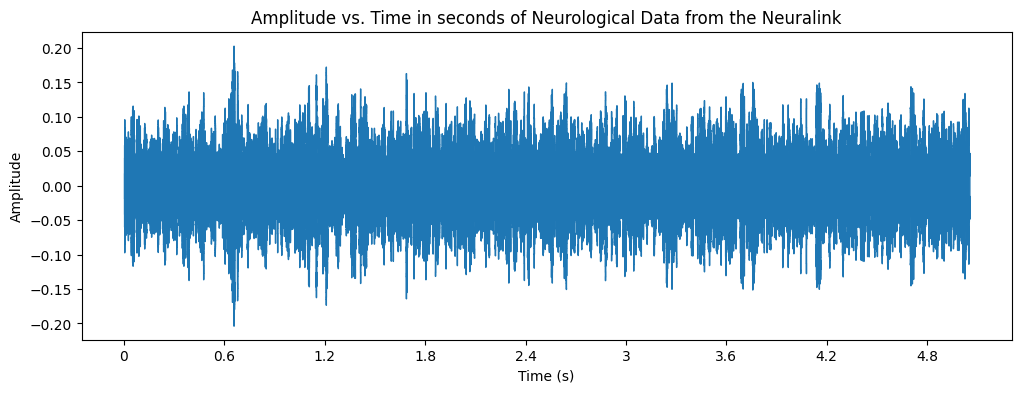

In [9]:
# Defining a figure that is 12 inches by 4 inches
plt.figure(figsize=(12, 4)) 
librosa.display.waveshow(data, sr=sample_rate)
title = 'Amplitude vs. Time in seconds of Neurological Data from the Neuralink'
plt.title(title)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()

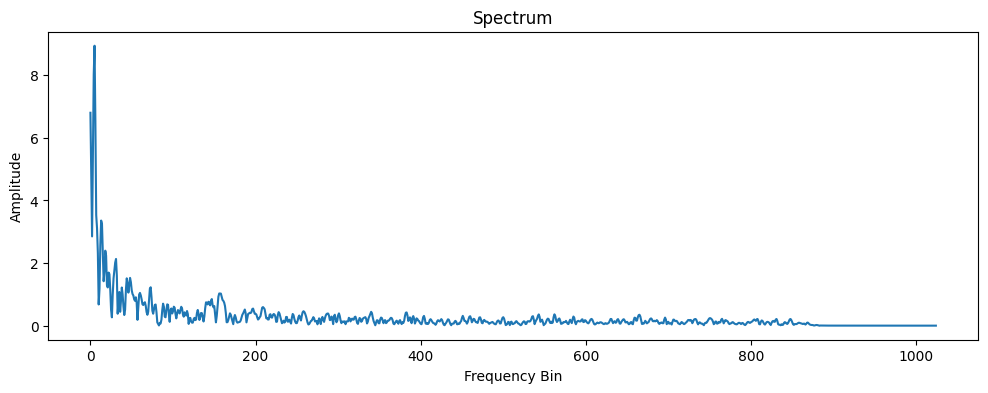

In [11]:
# Examining the frequency bins of the data
import numpy as np
import librosa
import matplotlib.pyplot as plt

n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length= n_fft +1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()
